In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [3]:
# Read the City and Ride Data
city_df = pd.read_csv("data/city_data.csv").dropna()
ride_df = pd.read_csv("data/ride_data.csv").dropna()

In [4]:
#View City Data
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
#View Ride Data
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [6]:
# Combine the data into a single dataset
merge_table = pd.merge(city_df, ride_df, on="city")

In [7]:
# Display the data table for preview
merge_table.head(10)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


In [8]:
#Average Fare ($) Per City - Group each city and then average the fare

city_avg_fare = merge_table.groupby(["city"]).mean()["fare"]
city_avg_fare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [9]:
#Total Number of Rides Per City - Group each city and then count the number of rides per city
city_rides_count = merge_table.groupby(["city"]).count()["ride_id"]
city_rides_count.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [10]:
#Total Number of Drivers Per City - Group each city and then count the number of drivers per city
city_drivers_count = merge_table.groupby(["city"]).mean()["driver_count"]
city_drivers_count.head()

city
Amandaburgh      12.0
Barajasview      26.0
Barronchester    11.0
Bethanyland      22.0
Bradshawfurt      7.0
Name: driver_count, dtype: float64

In [11]:
#City Type (Urban, Suburban, Rural) - list of each city type
city_type = city_df.set_index('city')['type']
city_type.head()

city
Richardfort     Urban
Williamsstad    Urban
Port Angela     Urban
Rodneyfort      Urban
West Robert     Urban
Name: type, dtype: object

In [12]:
#Create Data Frame of above Data Series
city_data = pd.DataFrame({"Avg Fare" : city_avg_fare, 
                          "Number of Rides" : city_rides_count, 
                          "Number of Drivers" : city_drivers_count, 
                          "City Type" : city_type})
city_data.head()

,Avg Fare,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,18,12.0,Urban
Barajasview,25.332273,22,26.0,Urban
Barronchester,36.422500,16,11.0,Suburban
Bethanyland,32.956111,18,22.0,Suburban
Bradshawfurt,40.064000,10,7.0,Rural


In [13]:
#Rural City Information Dataframe
rural = city_data[city_data['City Type'] == 'Rural']
rural.head()

,Avg Fare,Number of Rides,Number of Drivers,City Type
Bradshawfurt,40.064000,10,7.0,Rural
Garzaport,24.123333,3,7.0,Rural
Harringtonfort,33.470000,6,4.0,Rural
Jessicaport,36.013333,6,1.0,Rural
Lake Jamie,34.358333,6,4.0,Rural


In [14]:
#suburban City Information Dataframe
suburban = city_data[city_data['City Type'] == 'Suburban']
suburban.head()

,Avg Fare,Number of Rides,Number of Drivers,City Type
Barronchester,36.422500,16,11.0,Suburban
Bethanyland,32.956111,18,22.0,Suburban
Brandonfort,35.437368,19,10.0,Suburban
Colemanland,30.894545,22,23.0,Suburban
Davidfurt,31.995882,17,23.0,Suburban


In [15]:
#urban City Information Dataframe
urban = city_data[city_data['City Type'] == 'Urban']
urban.head()

,Avg Fare,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,18,12.0,Urban
Barajasview,25.332273,22,26.0,Urban
Carriemouth,28.314444,27,52.0,Urban
Christopherfurt,24.501852,27,41.0,Urban
Deanville,25.842632,19,49.0,Urban


## Bubble Plot of Ride Sharing Data

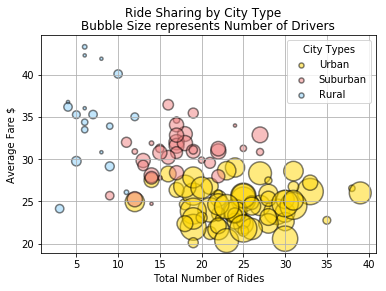

In [16]:
# Build the scatter plots for each city types

plt.scatter(urban["Number of Rides"], urban["Avg Fare"], 
            color = "gold", edgecolors="black", s = urban["Number of Drivers"]*10, 
            label = "Urban", alpha = 0.5, linewidth = 1.5)
plt.scatter(suburban["Number of Rides"], suburban["Avg Fare"], 
            color = "lightcoral", edgecolors="black", s = suburban["Number of Drivers"]*10, 
            label = "Suburban", alpha = 0.5, linewidth = 1.5)
plt.scatter(rural["Number of Rides"], rural["Avg Fare"], 
            color = "lightskyblue", edgecolors="black", s = rural["Number of Drivers"]*10, 
            label = "Rural", alpha = 0.5, linewidth = 1.5)
plt.xlabel('Total Number of Rides')
plt.ylabel('Average Fare $')
plt.suptitle('Ride Sharing by City Type')
plt.title('Bubble Size represents Number of Drivers')
bubble_lgnd = plt.legend(title = 'City Types', loc="best")
bubble_lgnd.legendHandles[0]._sizes=[25]
bubble_lgnd.legendHandles[1]._sizes=[25]
bubble_lgnd.legendHandles[2]._sizes=[25]
plt.grid(True)
plt.savefig("pyber_bubble.jpg")
plt.show()

## Total Fares by City Type

In [17]:
# Calculate City Fare by Type Percents
total_city_fare = merge_table.groupby(["type"]).sum()["fare"]
total_city_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [18]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [total_city_fare]

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]

#Explode Urban
explode = (0, 0, 0.2)

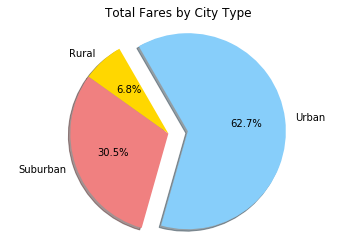

In [19]:
# Show Figure
plt.title("Total Fares by City Type")
plt.pie(total_city_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=120)
plt.axis("equal")

#Save Plot
plt.savefig("pyber_pie_city.jpg")
plt.show()

## Total Rides by City Type

In [20]:
# Calculate Total Ride by City Percents
total_city_rides = merge_table.groupby(["type"]).count()["ride_id"]
total_city_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [21]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [total_city_rides]

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]

#Explode Urban
explode = (0, 0, 0.2)

(-1.1200047120739811,
 1.3189667692082208,
 -1.1244777164347828,
 1.0921250221032157)

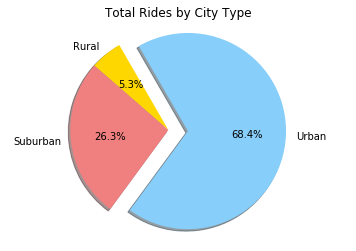

In [22]:
# Show Figure
plt.title("Total Rides by City Type")
plt.pie(total_city_rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=120)
plt.axis("equal")

In [23]:
# Save Figure
plt.savefig("pyber_pie_rides.jpg")
plt.show()

<Figure size 432x288 with 0 Axes>

## Total Drivers by City Type

In [24]:
# Calculate Total Drivers by city Type Percents
total_city_drivers = merge_table.groupby(["type"]).sum()["driver_count"]
total_city_drivers

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [25]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [total_city_drivers]

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]

#Explode Urban
explode = (0, 0, 0.2)

(-1.0842594801366716,
 1.2731368078914724,
 -1.2244903685387138,
 0.9880805169433508)

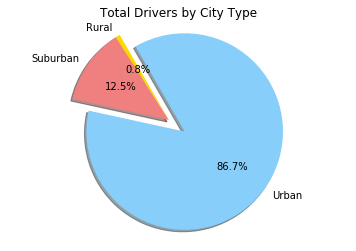

In [26]:
# Show Figure
plt.title("Total Drivers by City Type")
plt.pie(total_city_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=120)
plt.axis("equal")

In [27]:
# Save Figure
plt.savefig("pyber_pie_drivers.jpg")
plt.show()

<Figure size 432x288 with 0 Axes>

From these charts I observe the following:

1. Urban areas have higher uses of Pyber in terms of number of rides and drivers available.
2. However due to the concentration of drivers in the urban areas, the rural users much pay more to the few drivers who represent the rural area.
3. There is an opportunity to grow the Suburban market by offering more drivers.